In [1]:
from gurobipy import *
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

## Problem 0:
**This problem tests the performance of the optimization approach in controlling a single pond with no inflows**

Assume a idealized pond, with rectangular profile. 

### Attributes 
1. Initial Volume = 1000
2. Flow limit = 10
3. $\beta$ = 0.020
4. Unit Cost per unit volume

In [2]:
# Create a model 
m = Model("singlepond")

# Create Variable
x = m.addVar(lb=0, ub=1, vtype=GRB.CONTINUOUS, name="x")

# Set an objective function
m.setObjective((1-0.020*x)*(1000)*1.0, GRB.MINIMIZE)

# Add constraint 
m.addConstr(x <= 0.5, "c0")

# Optimize 
m.optimize()

Academic license - for non-commercial use only
Optimize a model with 1 rows, 1 columns and 1 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+01, 2e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [5e-01, 5e-01]
Presolve removed 1 rows and 1 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    9.9000000e+02   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  9.900000000e+02


In [3]:
for v in m.getVars():
    print(v.varName, v.x)

print("Obj:", m.objVal)

x 0.5
Obj: 990.0


There nothing great in what has happend here. It is just showing a decision made to release water based on upper threshold in the downstream channel. 

## Problem 1:
**This problem tests the performance of the optimization approach in controlling a single pond with initial volume for a horizon**

Assume a idealized pond, with rectangular profile. 

### Attributes 
1. Initial Volume = 1000
2. Flow limit = 10
3. Unit Cost per unit volume

We are using a linear approximation of the square root as the constraint.

In [4]:
# Create a model 
m = Model("singlepond_horizon")

# Create intial volume 
InitVolume = 500

# Create Variable
horizon = [i for i in range(0,55)]
outflow = m.addVars(horizon, lb=0, vtype=GRB.CONTINUOUS, name="valve")
volume = m.addVars(horizon, lb=0, ub=1000, vtype=GRB.CONTINUOUS, name="volume")

In [5]:
# Define the constrat for updating volume
m.addConstr(volume[0] == InitVolume, "InitialConditions")
m.addConstrs(volume[time]  == volume[time-1] - outflow[time] for time in horizon[1:])

# Define the constraint for maintaning water under threshold 
m.addConstrs(outflow[time] <= 10 for time in horizon)

# Define the constraint for maintaning water under threshold 
m.addConstrs(outflow[time] <= (volume[time-1]*6.14647148e-02 + 3.81)*0.447 for time in horizon[1:])

{1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>,
 4: <gurobi.Constr *Awaiting Model Update*>,
 5: <gurobi.Constr *Awaiting Model Update*>,
 6: <gurobi.Constr *Awaiting Model Update*>,
 7: <gurobi.Constr *Awaiting Model Update*>,
 8: <gurobi.Constr *Awaiting Model Update*>,
 9: <gurobi.Constr *Awaiting Model Update*>,
 10: <gurobi.Constr *Awaiting Model Update*>,
 11: <gurobi.Constr *Awaiting Model Update*>,
 12: <gurobi.Constr *Awaiting Model Update*>,
 13: <gurobi.Constr *Awaiting Model Update*>,
 14: <gurobi.Constr *Awaiting Model Update*>,
 15: <gurobi.Constr *Awaiting Model Update*>,
 16: <gurobi.Constr *Awaiting Model Update*>,
 17: <gurobi.Constr *Awaiting Model Update*>,
 18: <gurobi.Constr *Awaiting Model Update*>,
 19: <gurobi.Constr *Awaiting Model Update*>,
 20: <gurobi.Constr *Awaiting Model Update*>,
 21: <gurobi.Constr *Awaiting Model Update*>,
 22: <gurobi.Constr *Awaiting Model Update*

In [6]:
m.setObjective(volume.sum(), GRB.MINIMIZE)

In [7]:
m.optimize()

Optimize a model with 164 rows, 110 columns and 326 nonzeros
Coefficient statistics:
  Matrix range     [3e-02, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+03, 1e+03]
  RHS range        [2e+00, 5e+02]
Presolve removed 126 rows and 52 columns
Presolve time: 0.01s
Presolved: 38 rows, 58 columns, 267 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -2.4150819e+03   1.278898e+02   0.000000e+00      0s
      32    1.4136478e+04   0.000000e+00   0.000000e+00      0s

Solved in 32 iterations and 0.03 seconds
Optimal objective  1.413647833e+04


In [8]:
volume = []
outflow = []
for v in m.getVars():
    if v.varName.split("[")[0] == 'volume':
        volume.append(v.x)
    else:
        outflow.append(v.x)

print("Obj:", m.objVal)

Obj: 14136.478327395587


Text(0, 0.5, 'Volume')

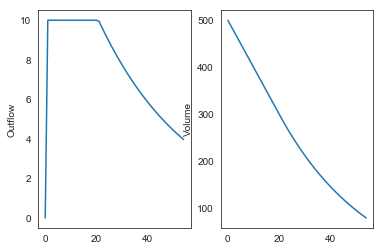

In [9]:
plt.subplot(1,2,1)
plt.plot(outflow)
plt.ylabel("Outflow")

plt.subplot(1,2,2)
plt.plot(volume)
plt.ylabel("Volume")

## Problem 2:
**This problem tests the performance of the optimization approach in controlling a single pond with constant inflow for a horizon**

Assume a idealized pond, with rectangular profile. 

### Attributes 
1. Initial Volume = 1000
2. Flow limit = 10
3. Unit Cost per unit volume

We have the constant inflow into the ponds so there should be a eqilibrium.

In [10]:
# Create a model 
m = Model("sp_in")

# Create intial volume 
InitVolume = 500
inflow = 20

# Create Variable
horizon = [i for i in range(0,55)]
outflow = m.addVars(horizon, lb=0, vtype=GRB.CONTINUOUS, name="valve")
volume = m.addVars(horizon, lb=0, ub=1000, vtype=GRB.CONTINUOUS, name="volume")

# Define the constrat for updating volume
m.addConstr(volume[0] == InitVolume, "InitialConditions")
m.addConstrs(volume[time]  == 20 + volume[time-1] - outflow[time] for time in horizon[1:])

# Define the constraint for maintaning water under threshold 
m.addConstrs(outflow[time] <= 10 for time in horizon)

# Define the constraint for maintaning water under threshold 
m.addConstrs(outflow[time] <= (volume[time-1]*6.14647148e-02 + 3.81)*0.447 for time in horizon[1:])

{1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>,
 4: <gurobi.Constr *Awaiting Model Update*>,
 5: <gurobi.Constr *Awaiting Model Update*>,
 6: <gurobi.Constr *Awaiting Model Update*>,
 7: <gurobi.Constr *Awaiting Model Update*>,
 8: <gurobi.Constr *Awaiting Model Update*>,
 9: <gurobi.Constr *Awaiting Model Update*>,
 10: <gurobi.Constr *Awaiting Model Update*>,
 11: <gurobi.Constr *Awaiting Model Update*>,
 12: <gurobi.Constr *Awaiting Model Update*>,
 13: <gurobi.Constr *Awaiting Model Update*>,
 14: <gurobi.Constr *Awaiting Model Update*>,
 15: <gurobi.Constr *Awaiting Model Update*>,
 16: <gurobi.Constr *Awaiting Model Update*>,
 17: <gurobi.Constr *Awaiting Model Update*>,
 18: <gurobi.Constr *Awaiting Model Update*>,
 19: <gurobi.Constr *Awaiting Model Update*>,
 20: <gurobi.Constr *Awaiting Model Update*>,
 21: <gurobi.Constr *Awaiting Model Update*>,
 22: <gurobi.Constr *Awaiting Model Update*

In [11]:
m.setObjective(volume.sum(), GRB.MINIMIZE)
m.optimize()

Optimize a model with 164 rows, 110 columns and 326 nonzeros
Coefficient statistics:
  Matrix range     [3e-02, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+03, 1e+03]
  RHS range        [2e+00, 5e+02]
Presolve removed 57 rows and 2 columns
Presolve time: 0.01s

Solved in 0 iterations and 0.01 seconds
Infeasible model


In [12]:
volume = []
outflow = []
for v in m.getVars():
    if v.varName.split("[")[0] == 'volume':
        volume.append(v.x)
    else:
        outflow.append(v.x)

print("Obj:", m.objVal)

plt.subplot(1,2,1)
plt.plot(outflow)
plt.ylabel("Outflow")

plt.subplot(1,2,2)
plt.plot(volume)
plt.ylabel("Volume")

AttributeError: b"Unable to retrieve attribute 'x'"